# Worksheet 17

Name: Shivangi 
UID: U35642613

### Topics

- Gradient Descent

## Gradient Descent

Recall in Linear Regression we are trying to find the line $$y = X \beta$$ that minimizes the sum of square distances between the predicted `y` and the `y` we observed in our dataset:

$$\mathcal{L}(\mathbf{\beta}) = \Vert \mathbf{y} - X\mathbf{\beta} \Vert^2$$

We were able to find a global minimum to this loss function but we will try to apply gradient descent to find that same solution.

a) Implement the `loss` function to complete the code and plot the loss as a function of beta.

(100, 2)
(100,)


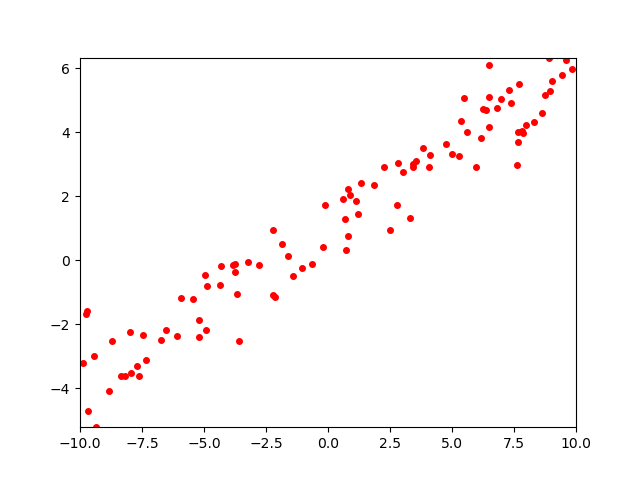

In [67]:
%matplotlib widget
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

beta = np.array([ 1 , .5 ])
xlin = -10.0 + 20.0 * np.random.random(100)
X = np.column_stack([np.ones((len(xlin), 1)), xlin])
y = beta[0]+(beta[1]*xlin)+np.random.randn(100)

print(X.shape)
print(y.shape)

fig, ax = plt.subplots()
ax.plot(xlin, y,'ro',markersize=4)
ax.set_xlim(-10, 10)
ax.set_ylim(min(y), max(y))
plt.show()

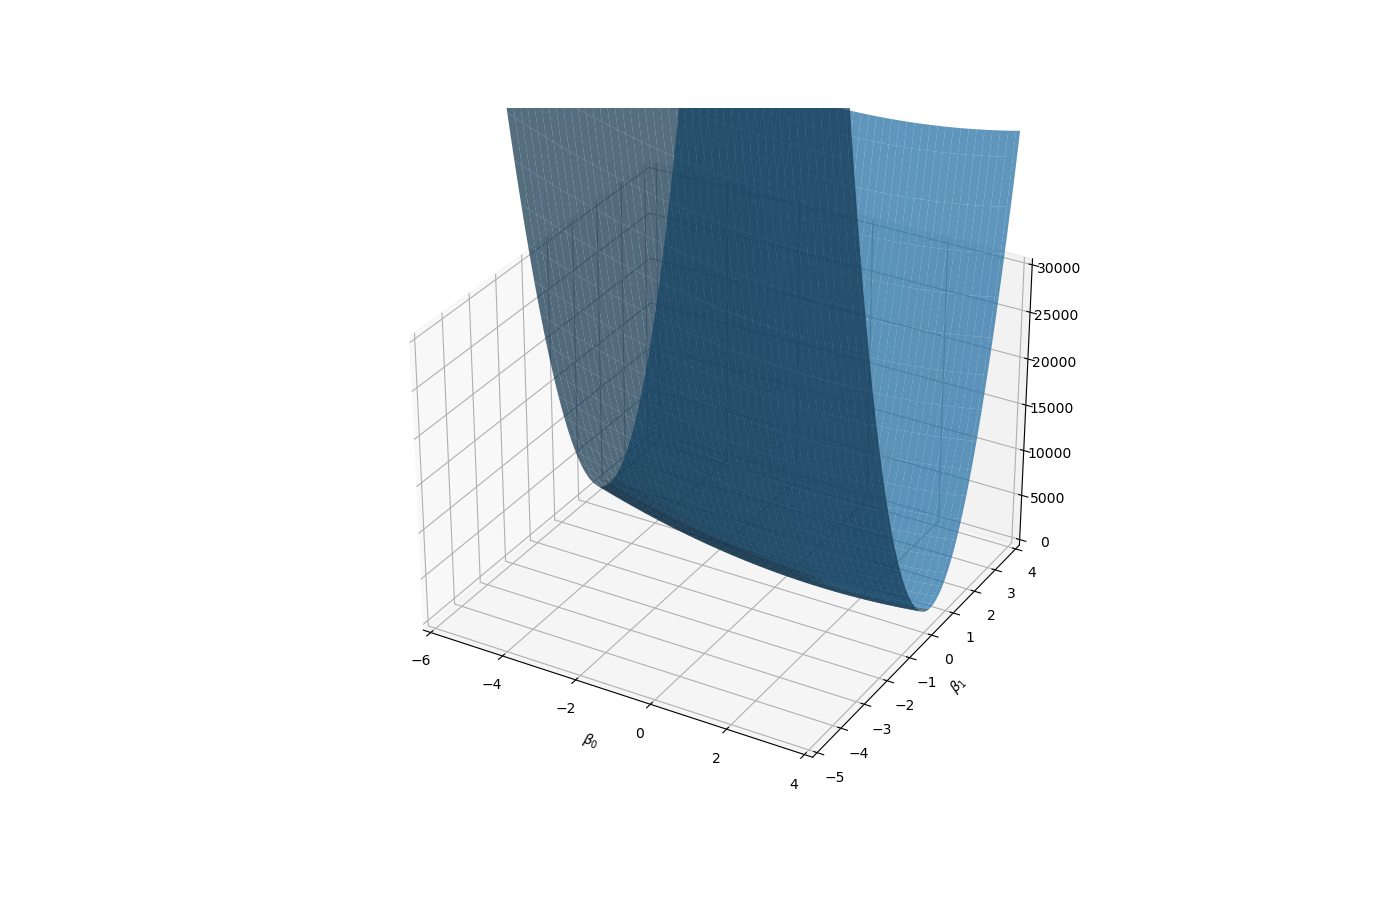

In [68]:
b0 = np.arange(-5, 4, 0.1)
b1 = np.arange(-5, 4, 0.1)
b0, b1 = np.meshgrid(b0, b1)

def loss(X, y, beta):
    return np.linalg.norm(y - X @ beta) ** 2

def get_cost(B0, B1):
    res = []
    for b0, b1 in zip(B0, B1):
        line = []
        for i in range(len(b0)):
            beta = np.array([b0[i], b1[i]])
            line.append(loss(X, y, beta))
        res.append(line)
    return np.array(res)

cost = get_cost(b0, b1)
 
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.set_xlim(-6, 4)
ax.set_xlabel(r'$\beta_0$')
ax.set_ylabel(r'$\beta_1$')
ax.set_ylim(-5, 4)
ax.set_zlim(0, 30000)

# Creating plot
ax.plot_surface(b0, b1, cost, alpha=.7)
 
# show plot
plt.show()

Since the loss is

$$\mathcal{L}(\mathbf{\beta}) = \Vert \mathbf{y} - X\mathbf{\beta} \Vert^2 = \beta^T X^T X \beta - 2\mathbf{\beta}^TX^T\mathbf{y}  + \mathbf{y}^T\mathbf{y}$$

The gradient is

$$\nabla_\beta \mathcal{L}(\mathbf{\beta}) = 2X^T X \beta - 2X^T\mathbf{y}$$

b) Implement the gradient function below and complete the gradient descent algorithm

In [69]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt

TEMPFILE = "temp.png"

def snap(betas, losses):
    # Creating figure
    fig = plt.figure(figsize =(14, 9))
    ax = plt.axes(projection ='3d')
    ax.view_init(20, -20)
    ax.set_xlim(-5, 4)
    ax.set_xlabel(r'$\beta_0$')
    ax.set_ylabel(r'$\beta_1$')
    ax.set_ylim(-5, 4)
    ax.set_zlim(0, 30000)

    # Creating plot
    ax.plot_surface(b0, b1, cost, color='b', alpha=.7)
    ax.plot(np.array(betas)[:,0], np.array(betas)[:,1], losses, 'o-', c='r', markersize=10, zorder=10)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))


def gradient(X, y, beta):
    return 2 * X.T @ X @ beta - 2 * X.T @ y


def gradient_descent(X, y, beta_hat, learning_rate, epochs, images):
    losses = [loss(X, y, beta_hat)]
    betas = [beta_hat]

    for _ in range(epochs):
        images.append(snap(betas, losses))
        beta_hat = beta_hat - learning_rate * gradient(X, y, beta_hat)

        losses.append(loss(X, y, beta_hat))
        betas.append(beta_hat)
        
    return np.array(betas), np.array(losses)


beta_start = np.array([-5, -2])
learning_rate = 0.0002 # try .0005
images = []
betas, losses = gradient_descent(X, y, beta_start, learning_rate, 20, images)

images[0].save(
    'gd.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=500
)

c) Use the code above to create an animation of the linear model learned at every epoch.

In [70]:
def snap_model(beta):
    xplot = np.linspace(-10,10,50)
    yestplot = beta[0] + beta[1] * xplot
    fig, ax = plt.subplots()
    ax.plot(xplot, yestplot,'b-',lw=2)
    ax.plot(xlin, y,'ro',markersize=4)
    ax.set_xlim(-10, 10)
    ax.set_ylim(min(y), max(y))
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))


def gradient_descent(X, y, beta_hat, learning_rate, epochs, images):
    losses = [loss(X, y, beta_hat)]
    betas = [beta_hat]

    for _ in range(epochs):
        images.append(snap_model(beta_hat))
        beta_hat = beta_hat - learning_rate * gradient(X, y, beta_hat)

        losses.append(loss(X, y, beta_hat))
        betas.append(beta_hat)
        
    return np.array(betas), np.array(losses)


images = []
betas, losses = gradient_descent(X, y, beta_start, learning_rate, 100, images)

images[0].save(
    'model.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=200
)

In logistic regression, the `loss` is the negative log-likelihood

$$ \mathcal{l}(\mathbf{\beta}) = - \frac{1}{N} \sum_{i=1}^{N} y_i \log(\sigma(x_i \beta)) + (1 - y_i)\log(1 - \sigma(x_i \beta))$$

the gradient of which is:

$$\nabla_\beta \mathcal{l}(\mathbf{\beta}) = \frac{1}{N} \sum_{i=1}^{N} x_i (y_i - \sigma(x_i \beta)) $$

d) Plot the loss as a function of b.

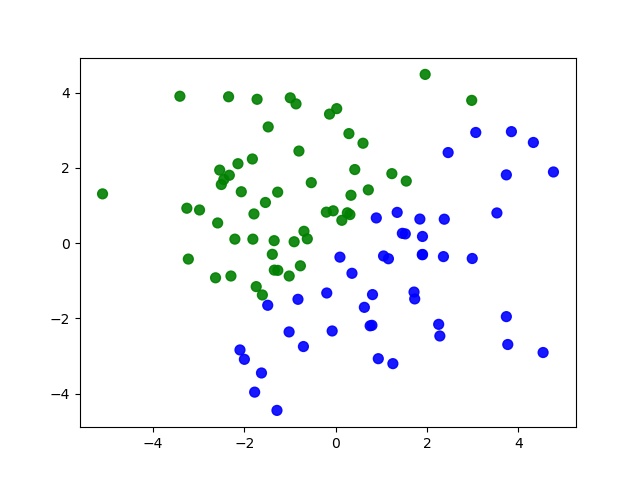

In [71]:
%matplotlib widget
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=100, centers=centers, cluster_std=2, random_state=0)

# LINE
def generate_line_data():
    # create some space between the classes
    X = t
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

X, y = generate_line_data()

cs = np.array([x for x in 'gb'])
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], color=cs[y].tolist(), s=50, alpha=0.9)
plt.show()

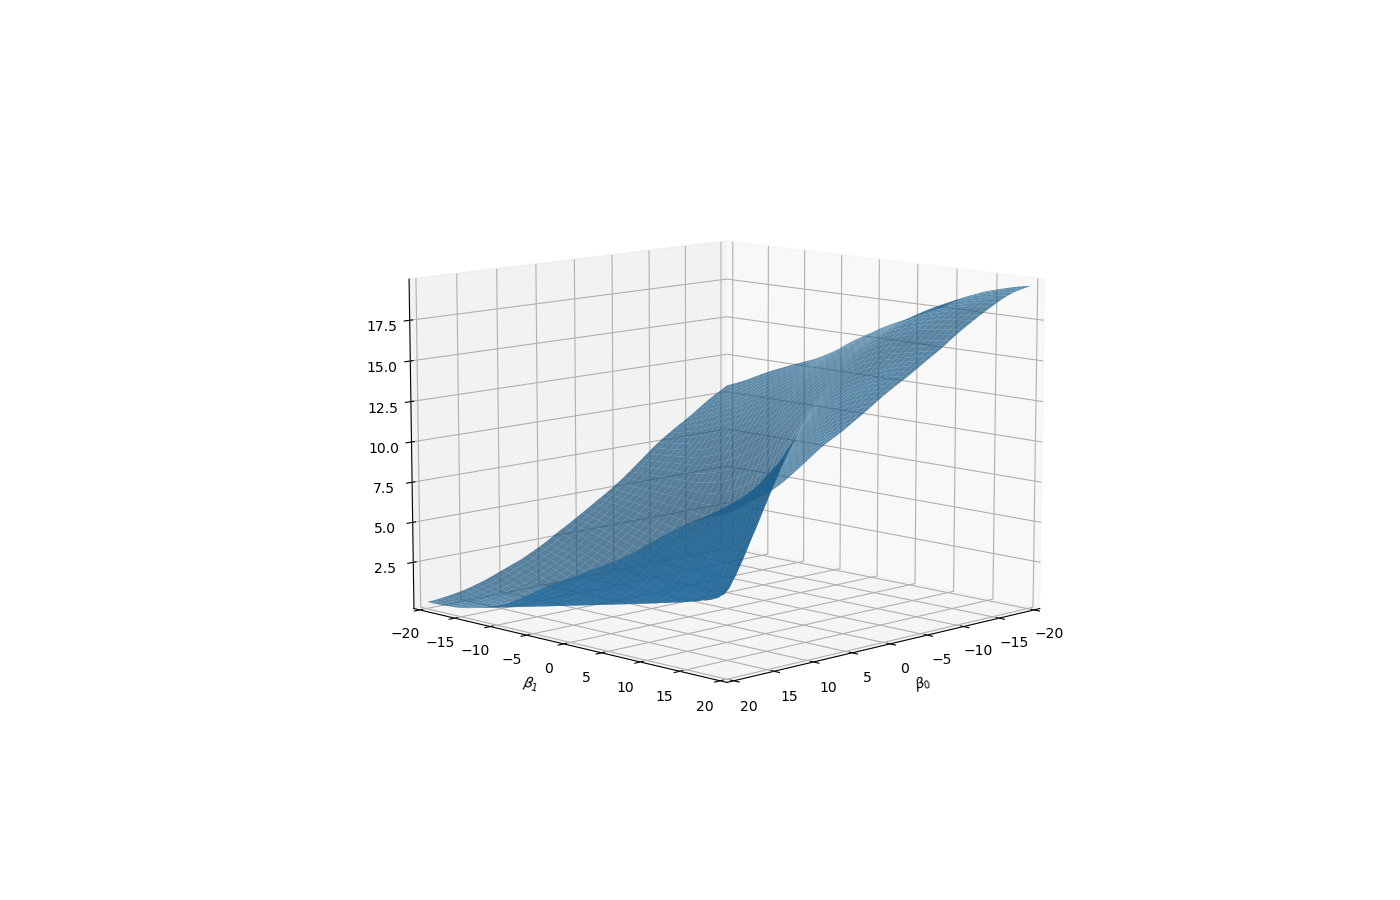

In [72]:
rangex = 20
b0 = np.arange(-rangex, rangex, 0.1)
b1 = np.arange(-rangex, rangex, 0.1)
b0, b1 = np.meshgrid(b0, b1)


def sigmoid(x):
    e = np.exp(x)
    return e / (1 + e)


def loss(X, y, beta):
    z = X.dot(beta)
    y_hat = sigmoid(z)
    eps = 1e-10  # small value to avoid taking log of 0 or 1
    cost = 0
    for i in range(len(y)):
        cost -= (1 - y[i]) * np.log(1 - y_hat[i] + eps)
        cost -= y[i] * np.log(y_hat[i] + eps)
    return cost / len(y)


def get_cost(B0, B1):
    res = []
    for b0, b1 in zip(B0, B1):
        line = []
        for i in range(len(b0)):
            beta = np.array([b0[i], b1[i]])
            line.append(loss(X, y, beta))
        res.append(line)
    return np.array(res)

cost = get_cost(b0, b1)

# cost[np.isnan(cost)] = -1e9
# cost[np.isinf(cost)] = -1e9


# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.set_xlim(-rangex, rangex)
ax.set_xlabel(r'$\beta_0$')
ax.set_ylabel(r'$\beta_1$')
ax.set_ylim(-rangex, rangex)
# ax.set_zlim(cost.min(), cost.max())
ax.view_init(10, 45)

# Creating plot
ax.plot_surface(b0, b1, cost, alpha=.7)
 
# show plot
plt.show()

e) Plot the loss at each iteration of the gradient descent algorithm.

In [73]:
def snap_model(beta):
    xplot = np.linspace(-10,10,50)
    yestplot = beta[0]+beta[1]*xplot
    fig, ax = plt.subplots()
    ax.plot(xplot, yestplot,'b-',lw=2)
    ax.plot(xlin, y,'ro',markersize=4)
    ax.set_xlim(-10, 10)
    ax.set_ylim(min(y), max(y))
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))


def gradient_descent(X, y, beta_hat, learning_rate, epochs, images):
    losses = [loss(X, y, beta_hat)]
    betas = [beta_hat]

    for _ in range(epochs):
        images.append(snap(betas, losses))
        beta_hat = beta_hat - learning_rate * gradient(X, y, beta_hat)

        losses.append(loss(X, y, beta_hat))
        betas.append(beta_hat)
        
    return np.array(betas), np.array(losses)


images = []
betas, losses = gradient_descent(X, y, beta_start, learning_rate, 100, images)

images[0].save(
    'model_log.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=200
)

f) Create an animation of the logistic regression fit at every epoch.

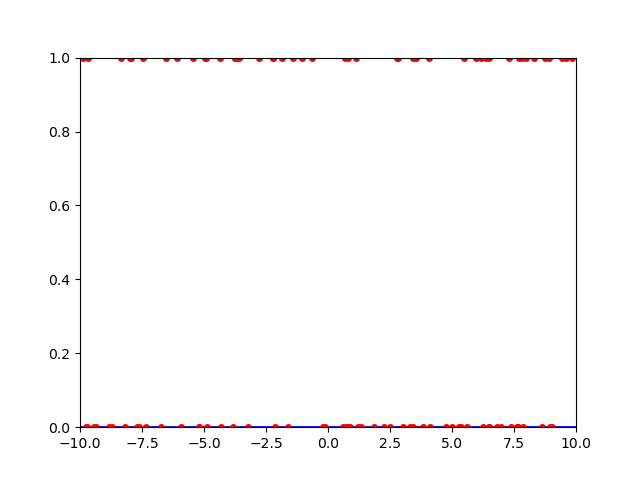

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from IPython.display import Image

# Define the logistic regression loss function and gradient
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def loss(X, y, beta):
    z = X.dot(beta)
    y_hat = sigmoid(z)
    eps = 1e-10
    cost = -np.mean((1 - y) * np.log(1 - y_hat + eps) + y * np.log(y_hat + eps))
    return cost

def gradient(X, y, beta):
    z = X.dot(beta)
    y_hat = sigmoid(z)
    gradient = X.T.dot(y_hat - y) / len(y)
    return gradient

def gradient_descent(X, y, beta_hat, learning_rate, epochs, images):
    losses = [loss(X, y, beta_hat)]
    betas = [beta_hat]

    for _ in range(epochs):
        images.append(snap_model(beta_hat))
        beta_hat = beta_hat - learning_rate * gradient(X, y, beta_hat)

        losses.append(loss(X, y, beta_hat))
        betas.append(beta_hat)
        
    return np.array(betas), np.array(losses)

# Generate synthetic data
centers = [[0, 0]]
X, _ = datasets.make_blobs(n_samples=100, centers=centers, cluster_std=2, random_state=0)
y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])

# Initialize logistic regression parameters
beta_start = np.array([0, 0])
learning_rate = 0.1
epochs = 100

# Create animation frames
images = []
betas, losses = gradient_descent(X, y, beta_start, learning_rate, epochs, images)

# Save animation as GIF
imageio.mimsave('logistic_regression_animation.gif', images, duration=0.2)

# Display animation
Image('logistic_regression_animation.gif')


In [88]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image as im

def sigmoid(z):
    # Sigmoid activation function
    return 1 / (1 + np.exp(-z))

def log_loss(X, y, beta):
    # Binary cross-entropy loss for logistic regression
    z = np.dot(X, beta)
    p = sigmoid(z)
    loss = -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))
    return loss

def log_gradient(X, y, beta):
    # Gradient of the binary cross-entropy loss for logistic regression
    z = np.dot(X, beta)
    p = sigmoid(z)
    gradient = np.dot(X.T, (p - y)) / len(X)
    return gradient

def snap_model(beta):
    xplot = np.linspace(-10,10,50)
    yestplot = beta[0] + beta[1] * xplot
    fig, ax = plt.subplots()
    ax.plot(xplot, yestplot,'b-',lw=2)
    ax.plot(X[y==0][:, 0], X[y==0][:, 1], 'ro', markersize=4, label='Class 0')  # Update column indices here
    ax.plot(X[y==1][:, 0], X[y==1][:, 1], 'go', markersize=4, label='Class 1')  # Update column indices here
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.legend()
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))


def gradient_descent(X, y, beta_hat, learning_rate, epochs, images):
    losses = [log_loss(X, y, beta_hat)]
    betas = [beta_hat]

    for _ in range(epochs):
        images.append(snap_model(beta_hat))
        beta_hat = beta_hat - learning_rate * log_gradient(X, y, beta_hat)

        losses.append(log_loss(X, y, beta_hat))
        betas.append(beta_hat)

    return np.array(betas), np.array(losses)

X = np.random.randn(100, 2)  # Input features
y = np.random.randint(0, 2, size=100)  # Binary labels (0 or 1)
beta_start = np.zeros(2)  # Initial beta values
learning_rate = 0.1
images = []
betas, losses = gradient_descent(X, y, beta_start, learning_rate, 100, images)

# Convert numpy arrays to PIL images
images_pil = [im.fromarray(image) for image in images]

images_pil[0].save(
    'logi2.gif',
    optimize=False,
    save_all=True,
    append_images=images_pil[1:],  # Pass list of PIL images as append_images
    loop=0,
    duration=200
)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/shivangidhiman/opt/anaconda3/envs/CS506/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/h_/kfny25bn1zzfnh8sd3dsvypw0000gn/T/ipykernel_91882/1423064075.py", line 59, in <module>
    images_pil = [im.fromarray(image) for image in images]
  File "/var/folders/h_/kfny25bn1zzfnh8sd3dsvypw0000gn/T/ipykernel_91882/1423064075.py", line 59, in <listcomp>
    images_pil = [im.fromarray(image) for image in images]
  File "/Users/shivangidhiman/opt/anaconda3/envs/CS506/lib/python3.9/site-packages/PIL/Image.py", line 3013, in fromarray
  File "/Users/shivangidhiman/opt/anaconda3/envs/CS506/lib/python3.9/site-packages/PIL/Image.py", line 2932, in frombuffer
    return im._new(core.fill(mode, size, color))
TypeError: expected string or buffer

During handling of the above exception, another exception occurred:

Traceback (most recent call l

g) Modify the above code to evaluate the gradient on a random batch of the data. Overlay the true loss curve and the approximation of the loss in your animation.

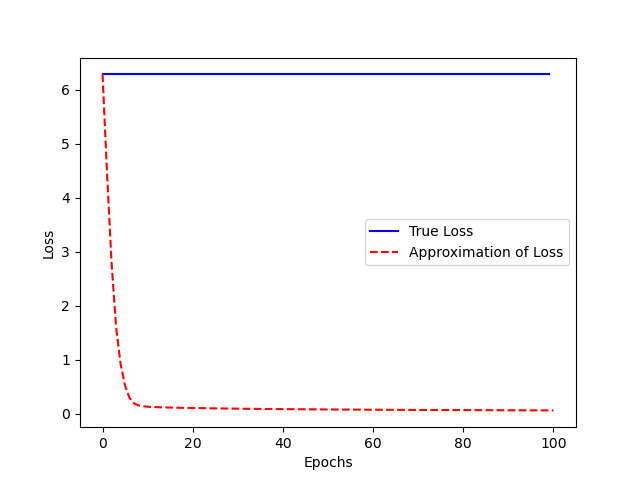

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image as im

def snap_model(beta):
    xplot = np.linspace(-10,10,50)
    yestplot = beta[0]+beta[1]*xplot
    fig, ax = plt.subplots()
    ax.plot(xplot, yestplot,'b-',lw=2)
    ax.plot(xlin, y,'ro',markersize=4)
    ax.set_xlim(-10, 10)
    ax.set_ylim(min(y), max(y))
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))


def gradient_descent(X, y, beta_hat, learning_rate, epochs, images, batch_size=32):
    losses = [loss(X, y, beta_hat)]
    betas = [beta_hat]

    for _ in range(epochs):
        # Randomly sample a batch of data
        indices = np.random.choice(X.shape[0], batch_size, replace=False)
        X_batch = X[indices]
        y_batch = y[indices]
        
        images.append(snap(betas, losses))
        # Compute the gradient using the sampled batch
        gradient = compute_gradient(X_batch, y_batch, beta_hat)
        beta_hat = beta_hat - learning_rate * gradient

        losses.append(loss(X, y, beta_hat))
        betas.append(beta_hat)
        
    return np.array(betas), np.array(losses)


# Compute the true loss using the entire X and y data
true_losses = [loss(X, y, beta_start) for _ in range(100)]

# Create a subplot to overlay the true loss curve and the approximation of the loss in the animation
fig, ax = plt.subplots()
ax.plot(true_losses, 'b-', label='True Loss')
ax.plot(losses, 'r--', label='Approximation of Loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()

# Save the animation as a GIF, overlaying the true loss curve and the approximation of the loss
images[0].save(
    'logi1.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=200
)
